# Basic Training Pipeline
Building a neural network with fundamental pipeline

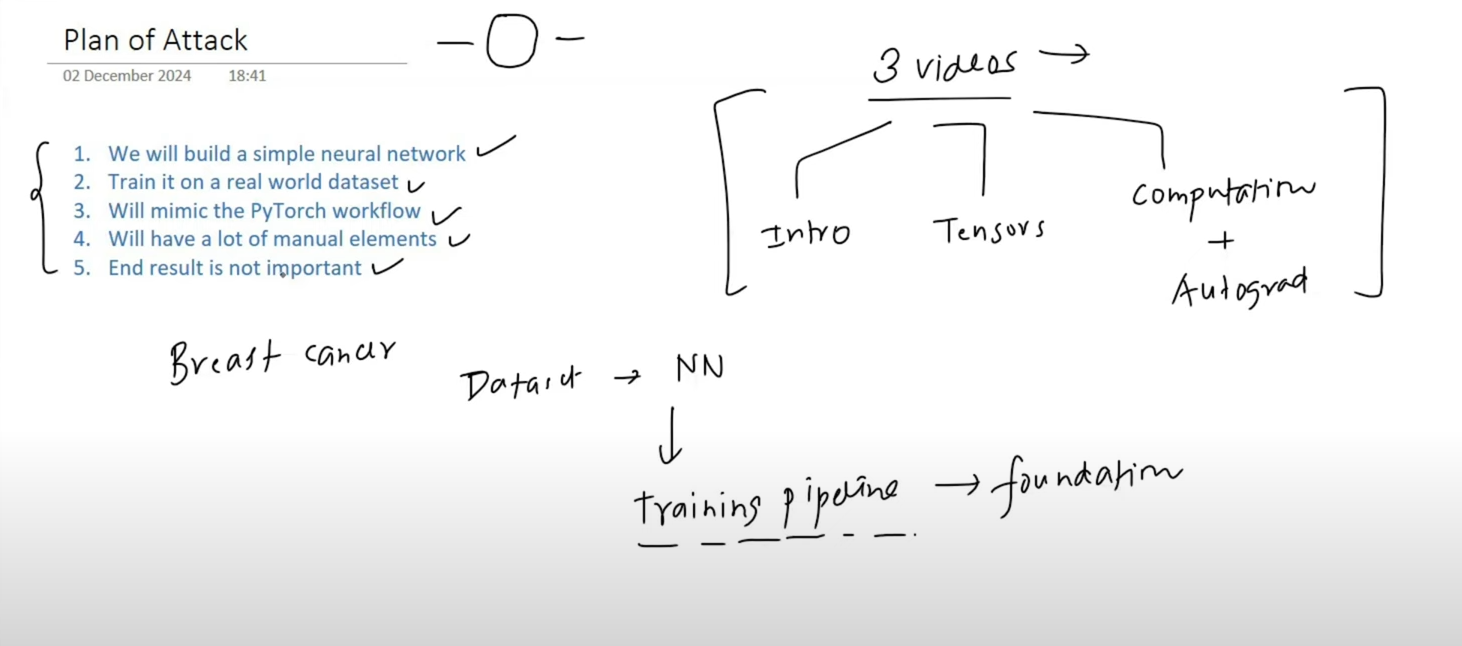  

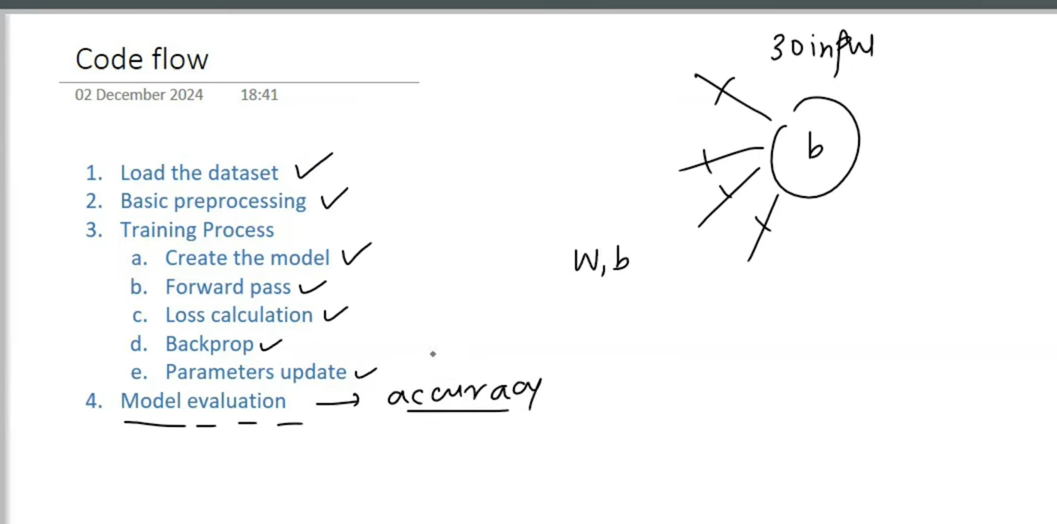

In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# Train test split

In [7]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

# Scaling
In neural network , input should be of same scale

In [8]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
X_train

array([[-0.16005602, -1.44183097, -0.19119335, ..., -0.52424429,
        -0.85186858,  0.20618453],
       [-0.37636249, -0.80367548, -0.36446696, ..., -0.20138618,
         1.07930148, -0.13159977],
       [ 0.47444298,  1.05298705,  0.47092946, ..., -0.03401304,
        -0.14316716, -1.16240488],
       ...,
       [ 0.10816401, -1.32622309,  0.07708776, ..., -0.34748574,
        -0.44548035, -0.73398178],
       [ 0.2581365 ,  0.60674064,  0.20139274, ...,  0.60888756,
        -0.36453311, -0.26952837],
       [-0.2696513 , -1.07188576, -0.32261343, ..., -0.21859277,
        -1.43501916, -1.20800576]])

In [10]:
X_test

array([[-0.09372203, -0.7481837 , -0.17068513, ..., -1.0746986 ,
        -0.58424706, -0.97324567],
       [-0.50614638, -0.85454295, -0.41343559, ...,  0.93894115,
         1.79956679,  2.30157316],
       [ 0.82341743,  0.37090056,  0.80994303, ...,  1.07346537,
        -0.45043631, -0.4237832 ],
       ...,
       [ 1.72902054,  1.71888843,  1.72653529, ...,  1.58184175,
         0.62004975, -0.40520506],
       [ 1.98570423,  1.65877233,  2.10321704, ...,  2.75658226,
         1.98624105,  2.5267627 ],
       [-0.21773774, -0.25338198, -0.24476587, ..., -0.5469257 ,
        -0.35957715, -0.98450514]])

In [11]:
y_train

,diagnosis
220,B
143,B
13,M
506,B
389,M
...,...
117,M
328,M
513,B
54,M


# Label Encoding

In [12]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [13]:
y_train

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,

### Numpy arrays to PyTorch tensors

In [14]:
X_train_tensor=torch.from_numpy(X_train)
X_test_tensor=torch.from_numpy(X_test)
y_train_tensor=torch.from_numpy(y_train)
y_test_tensor=torch.from_numpy(y_test)

In [15]:
X_test

array([[-0.09372203, -0.7481837 , -0.17068513, ..., -1.0746986 ,
        -0.58424706, -0.97324567],
       [-0.50614638, -0.85454295, -0.41343559, ...,  0.93894115,
         1.79956679,  2.30157316],
       [ 0.82341743,  0.37090056,  0.80994303, ...,  1.07346537,
        -0.45043631, -0.4237832 ],
       ...,
       [ 1.72902054,  1.71888843,  1.72653529, ...,  1.58184175,
         0.62004975, -0.40520506],
       [ 1.98570423,  1.65877233,  2.10321704, ...,  2.75658226,
         1.98624105,  2.5267627 ],
       [-0.21773774, -0.25338198, -0.24476587, ..., -0.5469257 ,
        -0.35957715, -0.98450514]])

In [16]:
X_train_tensor.shape

torch.Size([455, 30])

In [17]:
y_train_tensor.shape

torch.Size([455])

In [18]:
X_train.shape[1]

30

## Define Model

In [19]:
class MySimpleNN():

  def __init__(self,X):
    self.weight=torch.rand(X_train.shape[1],1,dtype=torch.float64,requires_grad=True)
    self.bias=torch.rand(1,dtype=torch.float64,requires_grad=True)

  def forward(self,X):
    z=torch.matmul(X,self.weight)+self.bias
    y_pred=torch.sigmoid(z)
    return y_pred

  def loss_function(self,y_pred,y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss

In [20]:
## IMPORTANT PARAMETERS
learning_rate=0.1
epochs=25

## Training Pipeline

In [21]:
## creating model
model=MySimpleNN(X_train_tensor)

## define loop
for epochs in range(epochs):

  ## forward pass
  y_pred=model.forward(X_train_tensor)

  ## loss calculate
  loss=model.loss_function(y_pred,y_train_tensor)

  ## backward pass
  loss.backward()

  ## parameter update
  with torch.no_grad():
    model.weight -= learning_rate*model.weight.grad
    model.bias-=learning_rate*model.bias.grad

  ## Zero gradients
  model.weight.grad.zero_()
  model.bias.grad.zero_()

  ## Print loss in each epoch
  print(f'Epoch: {epochs+1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.757615350898029
Epoch: 2, Loss: 3.6422896461025394
Epoch: 3, Loss: 3.517917641430732
Epoch: 4, Loss: 3.3885392707196065
Epoch: 5, Loss: 3.256992629315716
Epoch: 6, Loss: 3.119718360391941
Epoch: 7, Loss: 2.978364376483422
Epoch: 8, Loss: 2.8303658082360457
Epoch: 9, Loss: 2.6776629711991498
Epoch: 10, Loss: 2.52083374971055
Epoch: 11, Loss: 2.363966192290248
Epoch: 12, Loss: 2.2072162420801904
Epoch: 13, Loss: 2.054364831830025
Epoch: 14, Loss: 1.9055417802031311
Epoch: 15, Loss: 1.7641788176104967
Epoch: 16, Loss: 1.6241793637953705
Epoch: 17, Loss: 1.4900658412078647
Epoch: 18, Loss: 1.3659355679709135
Epoch: 19, Loss: 1.2561283813296609
Epoch: 20, Loss: 1.1614284535469668
Epoch: 21, Loss: 1.0820461350889434
Epoch: 22, Loss: 1.0175221199982745
Epoch: 23, Loss: 0.9666794025941347
Epoch: 24, Loss: 0.9276682936898648
Epoch: 25, Loss: 0.8981701852241067


In [22]:
model.weight,model.bias

(tensor([[-0.0731],
         [ 0.1839],
         [ 0.3527],
         [ 0.0040],
         [ 0.1917],
         [-0.0349],
         [-0.2756],
         [-0.0342],
         [-0.1723],
         [ 0.4102],
         [ 0.3606],
         [ 0.0522],
         [-0.1960],
         [-0.1040],
         [ 0.6993],
         [-0.1687],
         [-0.2872],
         [-0.0377],
         [ 0.7271],
         [-0.0797],
         [ 0.2123],
         [ 0.4466],
         [-0.0968],
         [ 0.4411],
         [-0.0898],
         [-0.4316],
         [-0.0344],
         [ 0.0647],
         [ 0.0123],
         [ 0.3558]], dtype=torch.float64, requires_grad=True),
 tensor([-0.0185], dtype=torch.float64, requires_grad=True))

## Model Evaluation

In [30]:
with torch.no_grad():
  y_pred=model.forward(X_test_tensor)
  y_pred=(y_pred>0.5).float()
  acc=(y_pred==y_test_tensor).float().mean()
  print(f'Accuracy: {acc}')

Accuracy: 0.5098491907119751
